<a href="https://colab.research.google.com/github/ChaitanyaSood/Sentiment_Analysis/blob/main/Sentiment_Analysis_of_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Engineer Nanodegree


## Sentiment Analysis of Text Data


## Import  Libraries

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk

#from emoticons import EmoticonDetector
import re as regex
import numpy as np
#import plotly
#from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
#plotly.offline.init_notebook_mode()

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import the Data

In [5]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'Tweet'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']


In [6]:
train_data.head()

,Id,emotion,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5969 entries, 0 to 5969
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       5969 non-null   object
 1   emotion  5969 non-null   object
 2   Tweet    5969 non-null   object
dtypes: object(3)
memory usage: 186.5+ KB


In [8]:
test_data.head()

,Id,Tweet
0,6.289494e+17,dear @Microsoft the newOoffice for Mac is grea...
1,6.289766e+17,@Microsoft how about you make a system that do...
2,6.290232e+17,Not Available
3,6.291792e+17,Not Available
4,6.291863e+17,If I make a game as a #windows10 Universal App...


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4000 non-null   float64
 1   Tweet   4000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


# Data visualization

## Distribution of target class

<Axes: xlabel='emotion', ylabel='count'>

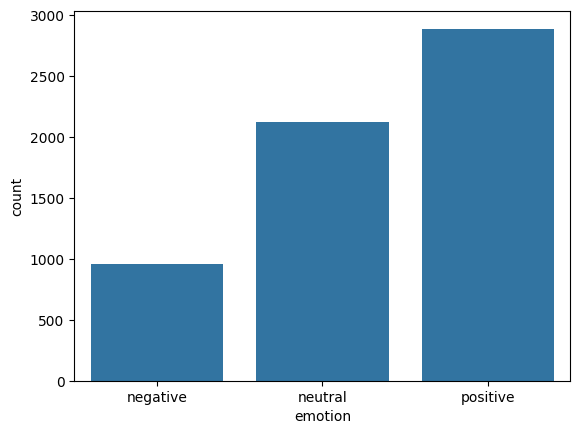

In [10]:
sns.countplot(x='emotion',data=train_data)

## Data Cleaning

In [11]:
# remove the tweets which contains Not available

train_data = train_data[train_data['Tweet'] != "Not Available"]

In [12]:
def clean_tweets(tweet):

    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)

    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)

    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [13]:
# Apply function to Tweet column

train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)

In [14]:
'''
text = 'text4 http://url.com/bla2/blah2'
re.sub(r"http\S+", "", text)
text = '@ajay dkfhskf dfs'
re.sub(r"@[^\s]+[\s]?",'',text)
re.sub('[^ a-zA-Z0-9]', '', text)
'''

'\ntext = \'text4 http://url.com/bla2/blah2\'\nre.sub(r"http\\S+", "", text)\ntext = \'@ajay dkfhskf dfs\'\nre.sub(r"@[^\\s]+[\\s]?",\'\',text)\nre.sub(\'[^ a-zA-Z0-9]\', \'\', text)\n'

In [15]:
train_data['Tweet'].head()

,Tweet
1,IOS App Transport Security Mm need to check i...
2,Mar if you have an iOS device you should downl...
3,my phone does not run on latest IOS which may ...
4,Not sure how to start your publication on iOS ...
5,Two Dollar Tuesday is here with Forklift Quic...


## Tokenization & stemming

In [16]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['Tweet'].apply(tt.tokenize)

,Tweet
1,"[IOS, App, Transport, Security, Mm, need, to, ..."
2,"[Mar, if, you, have, an, iOS, device, you, sho..."
3,"[my, phone, does, not, run, on, latest, IOS, w..."
4,"[Not, sure, how, to, start, your, publication,..."
5,"[Two, Dollar, Tuesday, is, here, with, Forklif..."
...,...
5963,"[Ok, ed, lets, do, this, Zlatan, greizmann, an..."
5964,"[Goal, level, Zlatan, k, by, Friday, Posting, ..."
5965,"[Wouldnt, surprise, me, if, we, enquiredHe, ca..."
5966,"[Rib, injury, for, Zlatan, against, Russia, is..."


In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [18]:
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)

    return stem_words

In [19]:
# apply tokenize function
train_data['text'] = train_data['Tweet'].apply(tokenize)

In [20]:
# apply steming function
train_data['tokenized'] = train_data['text'].apply(stemming)

In [21]:
train_data.head()

,Id,emotion,Tweet,text,tokenized
1,635930169241374720,neutral,IOS App Transport Security Mm need to check i...,"[IOS, App, Transport, Security, Mm, need, to, ...","[io, app, transport, secur, mm, need, to, chec..."
2,635950258682523648,neutral,Mar if you have an iOS device you should downl...,"[Mar, if, you, have, an, iOS, device, you, sho...","[mar, if, you, have, an, io, devic, you, shoul..."
3,636030803433009153,negative,my phone does not run on latest IOS which may ...,"[my, phone, does, not, run, on, latest, IOS, w...","[my, phone, doe, not, run, on, latest, io, whi..."
4,636100906224848896,positive,Not sure how to start your publication on iOS ...,"[Not, sure, how, to, start, your, publication,...","[not, sure, how, to, start, your, public, on, ..."
5,636176272947744772,neutral,Two Dollar Tuesday is here with Forklift Quic...,"[Two, Dollar, Tuesday, is, here, with, Forklif...","[two, dollar, tuesday, is, here, with, forklif..."


## Wordlist

In [22]:
words = Counter()
for idx in train_data.index:
    words.update(train_data.loc[idx, "text"])

words.most_common(5)

[('the', 3960), ('to', 2466), ('a', 1591), ('on', 1518), ('I', 1496)]

In [23]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('I', 1496), ('may', 914), ('th', 671), ('tomorrow', 651), ('not', 372)]

In [25]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3
    max_occurences=500
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []

    whitelist = whitelist if whitelist is None else whitelist
    #print(whitelist)
    '''
    import os
    if os.path.isfile("wordlist.csv"):
        word_df = pd.read_csv("wordlist.csv")
        word_df = word_df[word_df["occurrences"] > min_occurrences]
        wordlist = list(word_df.loc[:, "word"])
        #return
    '''
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [26]:
word_list(train_data)

In [27]:
words = pd.read_csv("wordlist.csv")

## Bag of Words

In [28]:
import os

In [29]:
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []

    # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

## Classification

In [30]:
import random
seed = 777
random.seed(seed)


In [31]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall

    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)

    log("=================== Results ===================")
    log("            Negative     Neutral     Positive")
    log("F1       " + str(f1))
    log("Precision" + str(precision))
    log("Recall   " + str(recall))
    log("Accuracy " + str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1

def log(x):
    #can be used to write to log file
    print(x)


## Experiment 1: BOW + Naive Bayes

In [32]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 1.1312611103057861s
Predicting time 0.6109457015991211s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.33557047 0.45629371 0.69152135]
Precision[0.51369863 0.44087838 0.64679415]
Recall   [0.24916944 0.47282609 0.74289406]
Accuracy 0.5599262446220037


In [33]:
def cv(classifier, X_train, y_train):
    log("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    log("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    log("Crosvalidation completed in {0}s".format(time() - now))
    log("Accuracy: " + str(accuracy[0]))
    log("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    log("===============================================")
    return accuracy

## Add Extra Features

To run the extra feature function we have to oad the data again because we have already removed the special charactrs and numbers.

In [35]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'emotion'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']
test_data = test_data[test_data['emotion'] != 'Tweet']

In [36]:
def add_extra_feature(df, tweet_column):

    # Print Number of Exclamation
    #length_of_excl = (len(re.findall(r'!', string)))
    df['number_of_exclamation'] = tweet_column.apply(lambda x: (len(re.findall(r'!', x))))

    # Number of ?
    #length_of_questionmark = (len(re.findall(r'?', string)))
    df['number_of_questionmark'] = tweet_column.apply(lambda x: (len(re.findall(r'[?]', x))))

    # Number of #
    df['number_of_hashtag'] = tweet_column.apply(lambda x: (len(re.findall(r'#', x))))

    # Number of @
    df['number_of_mention'] = tweet_column.apply(lambda x: (len(re.findall(r'@', x))))

    # Number of Quotes
    df['number_of_quotes'] = tweet_column.apply(lambda x: (len(re.findall(r"'", x))))

    # Number if underscore
    df['number_of_underscore'] = tweet_column.apply(lambda x: (len(re.findall(r'_', x))))


    #print((txt.split(" "), row))
    #print(row.split())

In [37]:
# pass the train_data into add_extra_feature function
add_extra_feature(train_data, train_data["Tweet"])


## ADD EMOTICONS

Here, users emoticons in a tweet also matters, so we will find the emoticons in a users tweet.

In [40]:
## Emoticon Detector

class EmoticonDetector:
    emoticons = {}

    def __init__(self, emoticon_file="/content/emoticons.txt"):
        from pathlib import Path
        content = Path(emoticon_file).read_text()
        positive = True
        for line in content.split("\n"):
            if "positive" in line.lower():
                positive = True
                continue
            elif "negative" in line.lower():
                positive = False
                continue

            self.emoticons[line] = positive

    def is_positive(self, emoticon):
        if emoticon in self.emoticons:
            return self.emoticons[emoticon]
        return False

    def is_emoticon(self, to_check):
        return to_check in self.emoticons

In [41]:
ed = EmoticonDetector()

In [42]:
processed_data = train_data.copy()

def add_column(column_name, column_content):
    processed_data.loc[:, column_name] = pd.Series(column_content, index=processed_data.index)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["Tweet"]))

positive_emo = list(
    map(lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and ed.is_positive(word), txt),
        processed_data["splitted_text"]))
add_column("number_of_positive_emo", positive_emo)

negative_emo = list(map(
    lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and not ed.is_positive(word), txt),
    processed_data["splitted_text"]))

add_column("number_of_negative_emo", negative_emo)

In [43]:
train_data['number_of_positive_emo'] = positive_emo
train_data['number_of_negative_emo'] = negative_emo

## WHY EXTRA FEATURES

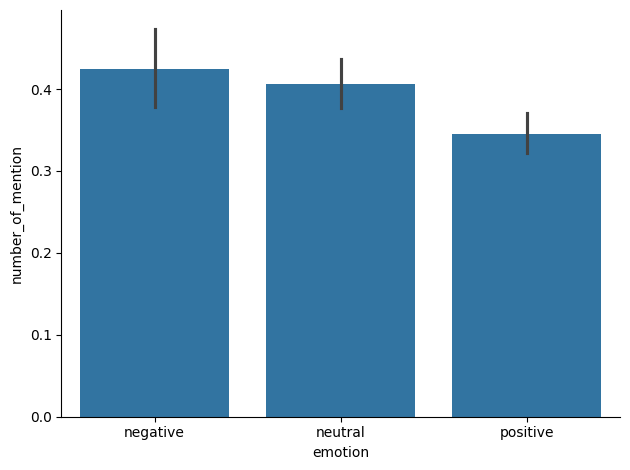

In [44]:
sns.barplot(x='emotion', y='number_of_mention', data=train_data)
sns.despine()
plt.tight_layout()

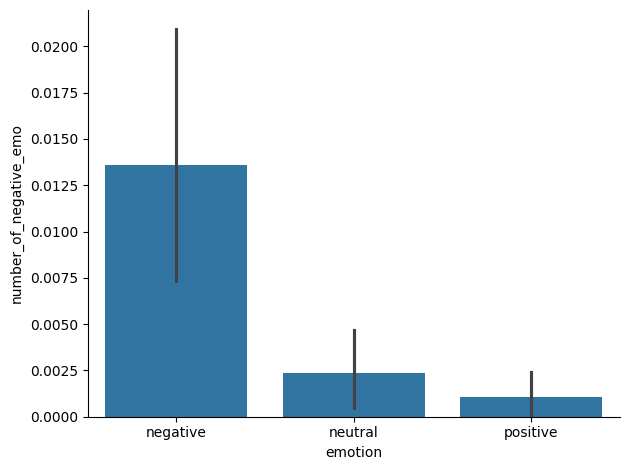

In [45]:
sns.barplot(x='emotion', y='number_of_negative_emo', data=train_data)
sns.despine()
plt.tight_layout()

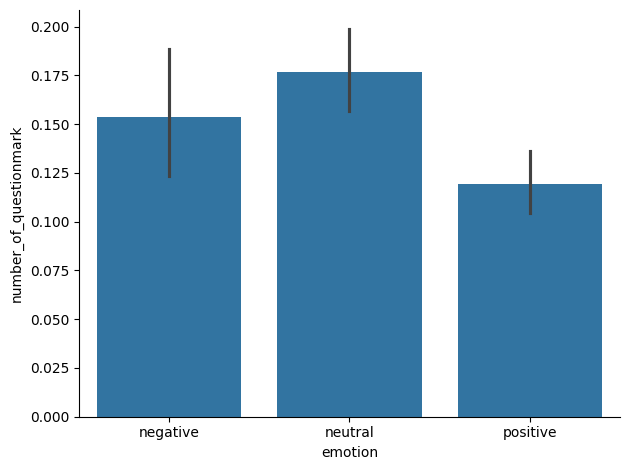

In [46]:
sns.barplot(x='emotion', y='number_of_questionmark', data=train_data)
sns.despine()
plt.tight_layout()

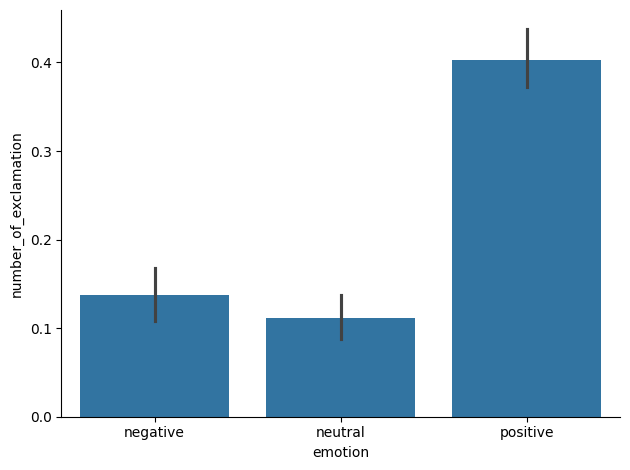

In [47]:
sns.barplot(x='emotion', y='number_of_exclamation', data=train_data)
sns.despine()
plt.tight_layout()

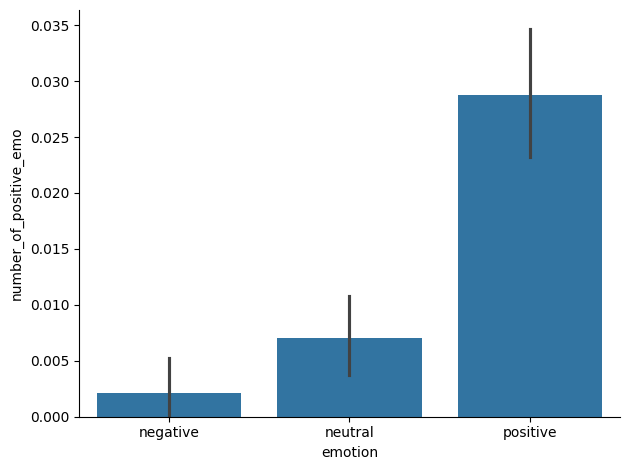

In [48]:
sns.barplot(x='emotion', y='number_of_positive_emo', data=train_data)
sns.despine()
plt.tight_layout()

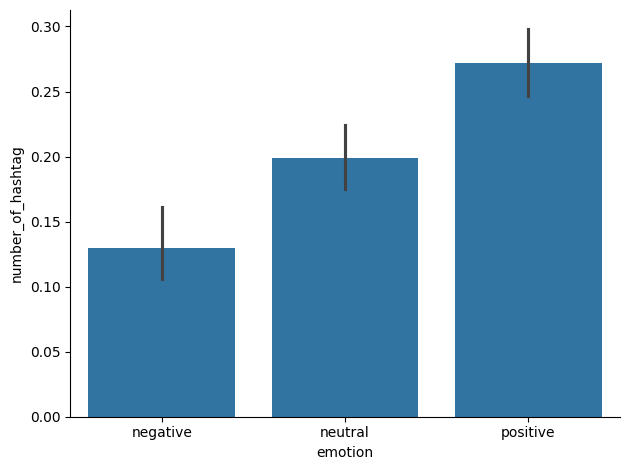

In [49]:
sns.barplot(x='emotion', y='number_of_hashtag', data=train_data)
sns.despine()
plt.tight_layout()

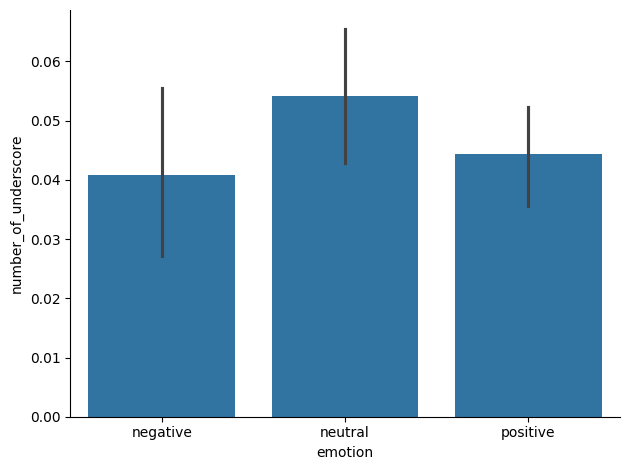

In [50]:
sns.barplot(x='emotion', y='number_of_underscore', data=train_data)
sns.despine()
plt.tight_layout()

## Preapre training data for model

In [51]:
train_data.head()

,Id,emotion,Tweet,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_quotes,number_of_underscore,number_of_positive_emo,number_of_negative_emo
0,635769805279248384,negative,Not Available,0,0,0,0,0,0,0,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,0,0,0,0,0,0,0
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,0,0,0,0,0,0
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,0,0,1,0,1,0,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,1,0,0,1,0,0,0


In [52]:
# apply the clean tweet function
train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)

In [53]:
## Tokenize data
train_data['text'] = train_data['Tweet'].apply(tokenize)
train_data['tokenized'] = train_data['text'].apply(stemming)

In [54]:
## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
        # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)



In [55]:
dat1 = train_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [56]:
train_data.columns

Index(['Id', 'emotion', 'Tweet', 'number_of_exclamation',
       'number_of_questionmark', 'number_of_hashtag', 'number_of_mention',
       'number_of_quotes', 'number_of_underscore', 'number_of_positive_emo',
       'number_of_negative_emo', 'text', 'tokenized'],
      dtype='object')

In [57]:
## Drop the columns in data_model
data_model = data_model.drop(columns=['emotion','Tweet','text', 'tokenized','Id'], axis=1)

## Experiment 2: Added feature + Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))



---------------------------------------------------------
Testing RandomForestClassifier
Learing time 28.465550422668457s
Predicting time 0.7658638954162598s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.24225352 0.46818923 0.69365317]
Precision[0.57333333 0.5008726  0.6071741 ]
Recall   [0.15357143 0.43950995 0.80885781]
Accuracy 0.5717476270240089


In [59]:
rf_acc = cv(RandomForestClassifier(n_estimators=403,n_jobs=-1, random_state=seed),data_model.drop(columns='label',axis=1), data_model['label'])

Crossvalidating RandomForestClassifier...
Crosvalidation completed in 311.4520649909973s
Accuracy: [0.53815261 0.51608579 0.41152815 0.3230563  0.39410188 0.50134048
 0.53887399 0.53351206]
Average accuracy: 0.4695814087448992


## Experiment 3: Added Feature + XGBoost

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode the labels
label_encoder = LabelEncoder()
data_model['label_encoded'] = label_encoder.fit_transform(data_model['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data_model.drop(columns=['label', 'label_encoded'], axis=1),
    data_model['label_encoded'],
    test_size=0.3,
    random_state=seed
)

# Train the classifier
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, XGBClassifier(seed=seed))



---------------------------------------------------------
Testing XGBClassifier
Learing time 11.707466840744019s
Predicting time 1.3525152206420898s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.25870647 0.45205479 0.69284294]
Precision[0.50980392 0.47826087 0.61301671]
Recall   [0.17333333 0.42857143 0.79657143]
Accuracy 0.5656058068118369


## Experiment 4: Added Feature + Naive Bayes

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.25937676429748535s
Predicting time 0.152357816696167s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.99142367 0.58305085 0.72787246]
Precision[0.99655172 0.63585952 0.68958333]
Recall   [0.98634812 0.53834116 0.77066356]
Accuracy 0.7230597431602457


## Test Data

In [66]:
test_data.head()

,Id,emotion
0,6.289494e+17,dear @Microsoft the newOoffice for Mac is grea...
1,6.289766e+17,@Microsoft how about you make a system that do...
2,6.290232e+17,Not Available
3,6.291792e+17,Not Available
4,6.291863e+17,If I make a game as a #windows10 Universal App...


In [67]:
test_data.columns

Index(['Id', 'emotion'], dtype='object')

In [68]:
# remove the tweets which contains Not available
test_data = test_data.rename(columns={"emotion": "Tweet"})
test_data = test_data[test_data['Tweet'] != "Not Available"]

In [69]:

# Drop null values
test_data = test_data.dropna()

# add extra features
add_extra_feature(test_data, test_data['Tweet'])

# Clean tweets
test_data['Tweet'] = test_data['Tweet'].apply(clean_tweets)

## Tokenize data
test_data['text'] = test_data['Tweet'].apply(tokenize)
test_data['tokenized'] = test_data['text'].apply(stemming)

In [70]:
# wordlist
word_list(test_data)

In [71]:
## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in test_data.index:
    current_row = []
        # add label
    current_label = test_data.loc[idx, "Tweet"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(test_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)



In [72]:
dat1 = test_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [73]:
test_model = pd.DataFrame()
test_model['original_id'] = data_model['Id']

In [74]:
data_model = data_model.drop(columns=['Tweet','text', 'tokenized','Id'], axis=1)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
RF = RandomForestClassifier(n_estimators=403,max_depth=10)

In [77]:
RF.fit(data_model.drop(columns='label',axis=1),data_model['label'])

RandomForestClassifier(max_depth=10, n_estimators=403)

In [78]:
predictions = RF.predict(data_model.drop(columns='label',axis=1))

In [79]:
results = pd.DataFrame([],columns=["Id","Category"])
results["Id"] = test_model["original_id"].astype("int64")
results["Category"] = predictions
results.to_csv("results_xgb.csv",index=False)

### Conclusion
The increase of microblogging sites like Twitter offers an unparalleled opening to form and employ approaches & technologies that search and mine for sentiments. The work presented in this paper specifies an approach for sentiment analysis on Twitter data. To unseal the sentiment, we extracted the relevant data from the tweets, added the features.
The overall tweet sentiment was then calculated using a model that presented in this report. This work is exploratory in nature and the prototype evaluated is a preliminary prototype.
The models showed that prediction of text sentiment is a non-trivial task for machine learning. A lot of preprocessing is needed just to be able to run an algorithm. The main problem for sentiment analysis is to craft the machine representation of the text. Simple bag-of-words was definitely not enough to obtain satisfying results, thus a lot of additional features were created basing on common sense (number of emoticons, exclamation marks, number of question mark etc). I think that a slight improvement in classification accuracy for the given training dataset could be developed, but since it included highly skewed data (small number of negative cases), the difference will be probably in the order of a few percents. The thing that could possibly enhance classification outcomes will be to add a lot of additional examples (increase training dataset), because given 5971 examples clearly do not include all sequence of words used, further - a lot of emotion-expressing information certainly is missing.